# Logistic regression from scratch in python

In [87]:
import numpy as np
from numpy.random import randn, randint
from numpy.random import seed
from matplotlib import pyplot as plt
import pandas as pd


In [88]:
df = pd.DataFrame({'infect_rate':[-4,-8,-2,-9,-5,-1,41,-18,-12,-29,-25,-12,42,38,-23,39,53,-31,44,84,-24,94,55,-15], 'infected/not':[0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0]})
df

,infect_rate,infected/not
0,-4,0
1,-8,1
2,-2,0
3,-9,1
4,-5,1
5,-1,0
6,41,0
7,-18,1
8,-12,0
9,-29,1


In [89]:
from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def sigmoid(self, z): 

        return 1/(1+np.exp(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=10, lr=0.001):        
        loss = []
        weights = rand(X.shape[1])

        
        N = len(X)

                 
        for _ in range(epochs):   
            y_hat = self.sigmoid(dot(X, weights))

            weights -= lr * dot(X.T,  y_hat - y) / N            

            loss.append(self.cost_function(X, y, weights)) 
            print(_)

            plt.scatter(X,y_hat, c = 'red',cmap='viridis')
            plt.grid()
            plt.show()
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        z = dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

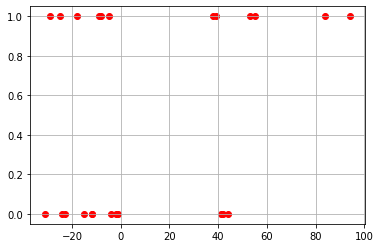

0


/tmp/ipykernel_143485/1648870944.py:13: RuntimeWarning: divide by zero encountered in log
  predict_0 = (1 - y) * log(1 - self.sigmoid(z))
/tmp/ipykernel_143485/1648870944.py:13: RuntimeWarning: invalid value encountered in multiply
  predict_0 = (1 - y) * log(1 - self.sigmoid(z))


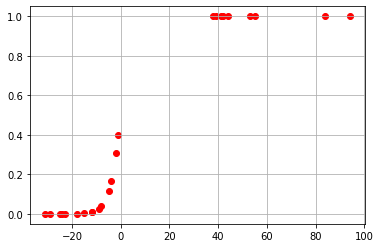

1


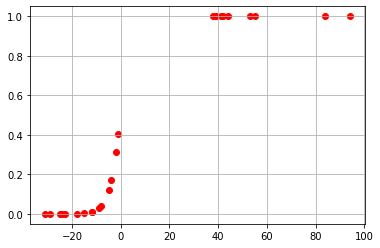

2


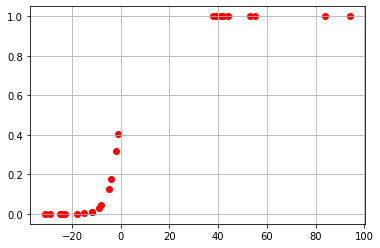

3


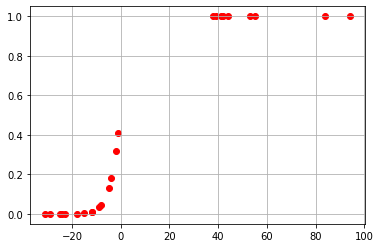

4


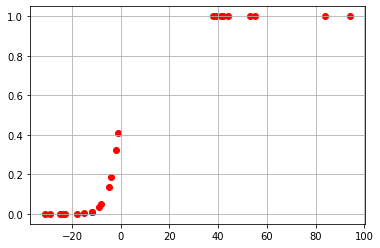

5


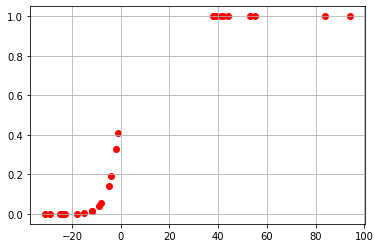

6


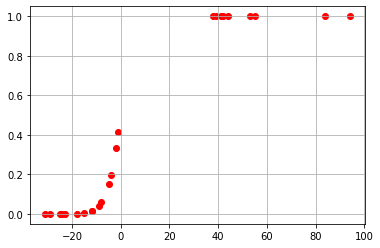

7


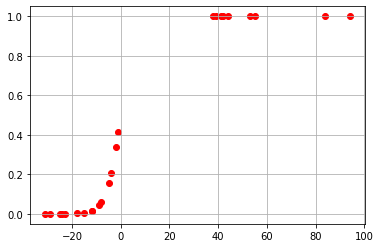

8


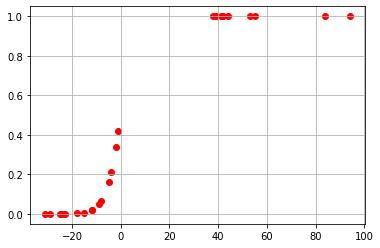

9


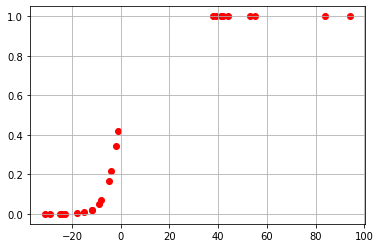

In [90]:

x = np.array(df.infect_rate).reshape(24,1)
y = np.array(df['infected/not']).reshape(24)

plt.scatter(x,y, c = 'red',cmap='viridis')
plt.grid()
plt.show()
L = LogisticRegression()
L.fit(x,y)

In [91]:
test = np.array([39]).reshape(1,1)

In [92]:
L.predict(test)

[1]